<a href="https://colab.research.google.com/github/bhavish-1/CNN_PROJECT_steak-pizza/blob/master/project_CNN_pizza_steak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

--2022-09-04 21:50:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   253MB/s    in 0.4s    

2022-09-04 21:50:30 (253 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]

['pizza' 'steak']


In [35]:
import os

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
#set the random seed
tf.random.set_seed(42)

#preprocess the data (get all of the pixel values between 0 and 1 also called as scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set up the train and test directories 
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, #number of images to process at a time
                                               target_size=(224,224), #converting all images to 224X224 in the data
                                               class_mode="binary", #which problem the given model is ......
                                               seed=42)
valid_data = train_datagen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size =(224,224),
                                              class_mode="binary",
                                              seed=42)

#creating the cnn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,                   # these are feature detectors .......
                           kernel_size=(3,3),            # 
                           activation="relu",            # 
                           input_shape=(224, 224, 3)),   #
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model

history_1=model.fit(train_data,
                    epochs=7,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/7
47/47 [==============================] - 10s 200ms/step - loss: 0.5946 - accuracy: 0.6767 - val_loss: 0.4111 - val_accuracy: 0.8300
Epoch 2/7
47/47 [==============================] - 9s 195ms/step - loss: 0.4235 - accuracy: 0.8187 - val_loss: 0.3435 - val_accuracy: 0.8600
Epoch 3/7
47/47 [==============================] - 9s 194ms/step - loss: 0.3899 - accuracy: 0.8327 - val_loss: 0.3410 - val_accuracy: 0.8580
Epoch 4/7
47/47 [==============================] - 9s 193ms/step - loss: 0.3861 - accuracy: 0.8440 - val_loss: 0.3332 - val_accuracy: 0.8620
Epoch 5/7
47/47 [==============================] - 9s 196ms/step - loss: 0.3129 - accuracy: 0.8740 - val_loss: 0.2881 - val_accuracy: 0.8700
Epoch 6/7
47/47 [==============================] - 9s 194ms/step - loss: 0.2973 - accuracy: 0.8767 - val_loss: 0.2824 - val_accuracy: 0.8800
Epoch 7/7
47/47 [==============================] - 9s 197ms/step - los

In [38]:
print(class_names)

['pizza' 'steak']


--2022-09-04 21:51:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2022-09-04 21:51:37 (61.3 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



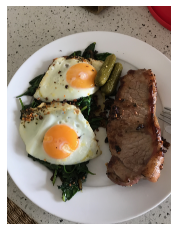

In [39]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [40]:
steak.shape

(4032, 3024, 3)

------------------------------------------------------------------------------------

In [41]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename) # will read the file name/input the file name .......!.........

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3) # the decode_image will tell the image is in which format i.e, jpeg,... and channels tells the amount of colur channels you used while training the model

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape]) #the image.resize() will resize the image into which size you trained the model.

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [42]:
steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [44]:
model.predict(steak)

ValueError: ignored

In [45]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] 
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [47]:
# Make a prediction on custom image tensor
pred = model.predict(steak)
pred

array([[0.91958165]], dtype=float32)

In [48]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [50]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

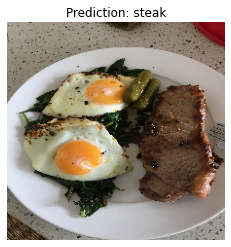

In [51]:
# Test our model on a custom image
pred_and_plot(model, "03-steak.jpeg", class_names)